# Image Analysis: Seeds Classification 

In [1]:
# Import modules 
import pandas as pd 

import matplotlib.pyplot as plt

from skimage import io
from skimage.color import rgb2gray, label2rgb
from skimage.filters import threshold_otsu
from skimage.morphology import area_opening, disk, binary_closing
from skimage.measure import find_contours
from skimage.measure import find_contours, label, regionprops_table


In [2]:
# Read Image file 
filename = "seeds.jpg"
RGB = io.imread(filename)
RGB.shape

(1506, 1506, 3)

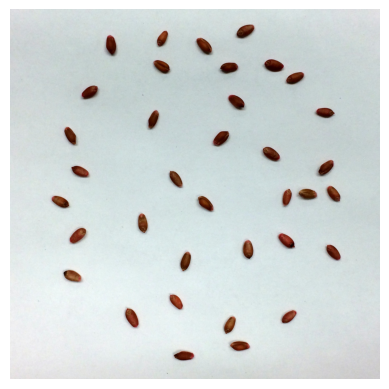

In [3]:
# Display Image 
plt.imshow(RGB)
plt.axis("off")
plt.show()

In [4]:
# Convert RGB into grayscale
I = rgb2gray(RGB)
I.shape

(1506, 1506)

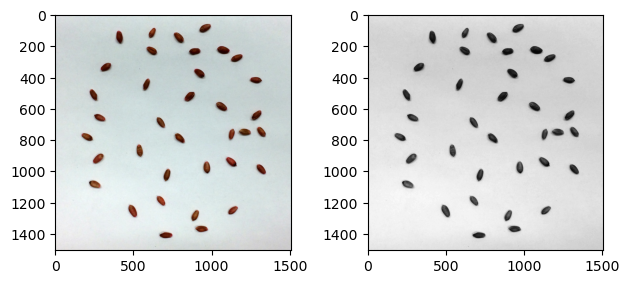

In [5]:
# Create a figure with 2 subplots showing the RGB and the I image 
plt.figure()
plt.subplot(1, 2, 1)
plt.imshow(RGB)

plt.subplot(1, 2, 2)
plt.imshow(I, cmap = 'gray')

plt.tight_layout()
plt.show()

In [6]:
#Slice the greyscale image to see values 
print(I[0:5, 0:5])

[[0.86499216 0.87283529 0.84146275 0.85912118 0.86304275]
 [0.86891373 0.86891373 0.84538431 0.85912118 0.86304275]
 [0.86499216 0.85714902 0.85127804 0.85519961 0.86304275]
 [0.86107059 0.84735647 0.85519961 0.85519961 0.86696431]
 [0.87032039 0.85071255 0.86639882 0.85519961 0.86696431]]


In [7]:
#Slice the greyscale image to see values 
#print(I[140:160, 420:440])

In [8]:
# Select global threshold 
global_threshold = threshold_otsu(I)
print(global_threshold)

0.5300021063112745


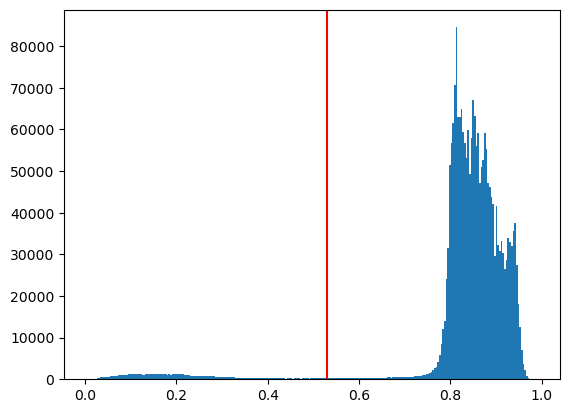

In [9]:
# Plot the histogram
plt.figure()
plt.hist(I.flatten(), bins= 'scott')
plt.axvline(global_threshold, color = 'r')
plt.show()

In [10]:
# Apply Otsu's threshold to classify the seeds into a binary image 
BW = I < global_threshold
BW

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

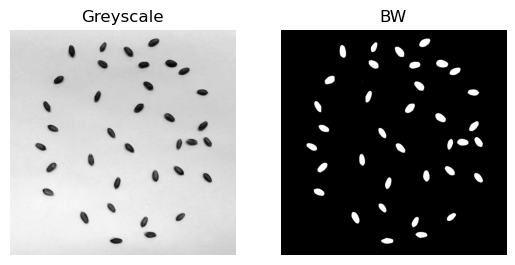

In [11]:
plt.figure()

plt.subplot(1, 2, 1)
plt.imshow(I, cmap='gray')
plt.axis('off')
plt.title('Greyscale')

plt.subplot(1, 2, 2)
plt.imshow(BW, cmap='gray')
plt.axis('off')
plt.title('BW')

plt.show()

In [12]:
# Identify and count the number of seeds in the BW image 
contours = find_contours(BW)
len(contours)

94

In [13]:
# Filter the image usin garea opening (removing small blobs of True pixels)
print((BW == True).sum())
BW = area_opening(BW, area_threshold=1000, connectivity=2)
print((BW == True).sum())

90041
90001


In [14]:
# Apply Binary closing 
footprint = disk(5)
print(footprint)
BW = binary_closing(BW, footprint)

[[0 0 0 0 0 1 0 0 0 0 0]
 [0 0 1 1 1 1 1 1 1 0 0]
 [0 1 1 1 1 1 1 1 1 1 0]
 [0 1 1 1 1 1 1 1 1 1 0]
 [0 1 1 1 1 1 1 1 1 1 0]
 [1 1 1 1 1 1 1 1 1 1 1]
 [0 1 1 1 1 1 1 1 1 1 0]
 [0 1 1 1 1 1 1 1 1 1 0]
 [0 1 1 1 1 1 1 1 1 1 0]
 [0 0 1 1 1 1 1 1 1 0 0]
 [0 0 0 0 0 1 0 0 0 0 0]]


In [15]:
# Identify and count the number of seeds in the BW image 
contours = find_contours(BW)
len(contours)

36

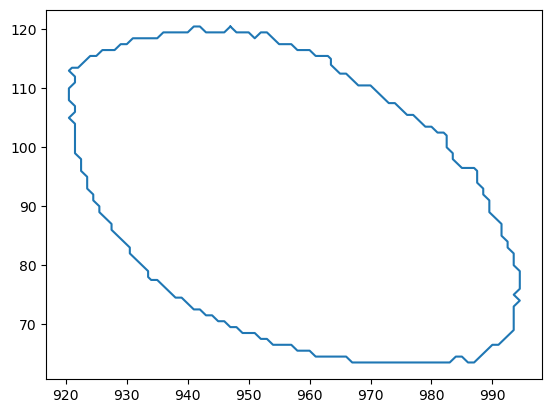

In [16]:
plt.figure()
plt.plot(contours[0][:, 1], contours[0][:, 0])
plt.show()

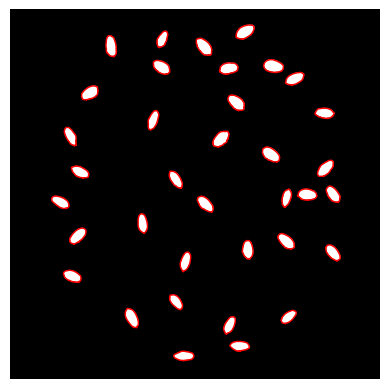

In [17]:
# Overlay seed contours on the BW image 

plt.figure()
plt.imshow(BW, cmap = 'gray')
plt.axis('off')

for contour in contours:
    plt.plot(contour[:, 1], contour[:, 0], "-r", linewidth = 1)

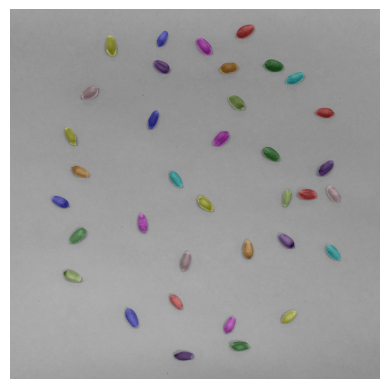

In [18]:
# label each seed
label_image = label(BW)
image_label_overlay = label2rgb(label_image, image = RGB, bg_label = 0)

# Display the labeled image 
plt.imshow(image_label_overlay)
plt.axis('off')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

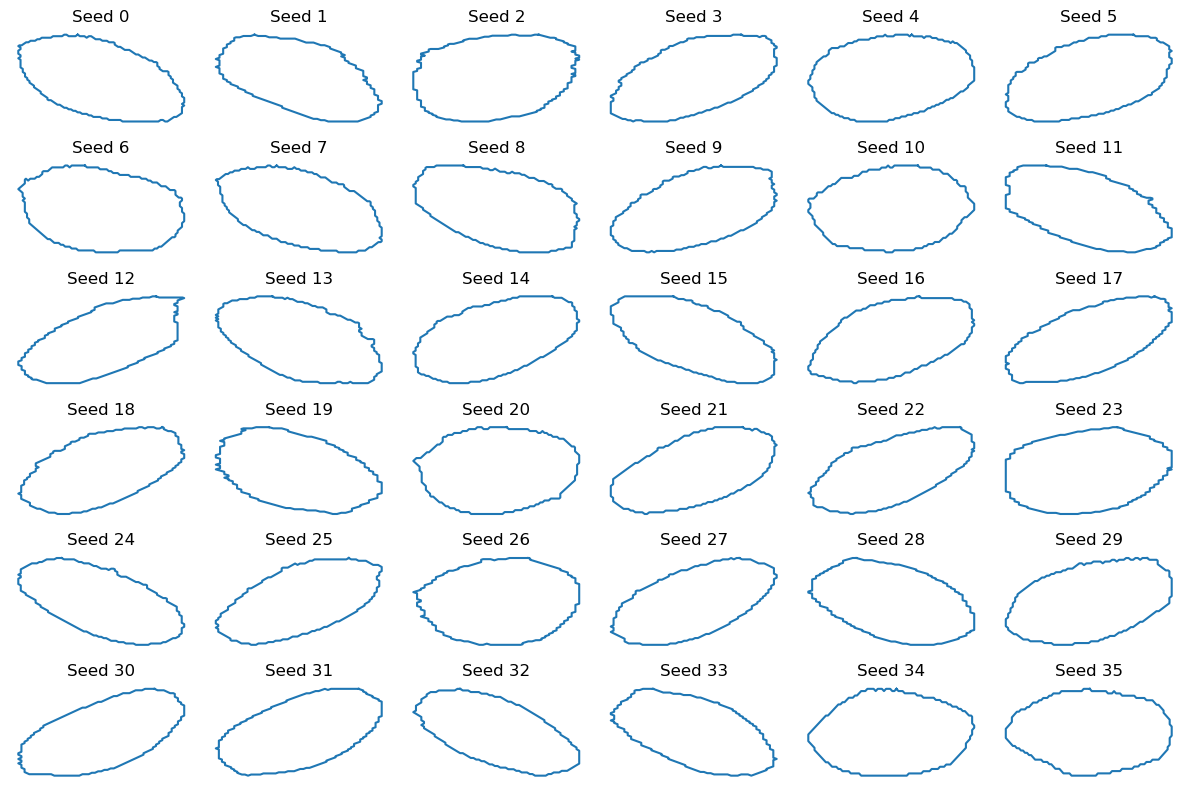

In [19]:
# Display contour of each seed 
plt.figure(figsize=(12, 8))

for k in range(36):
    plt.subplot(6, 6, k+1)
    plt.title(f"Seed {k}")
    plt.plot(contours[k][:, 1], contours[k][:, 0])
    plt.axis('off')
    plt.tight_layout()
plt.show

In [20]:
# Get seed properties 
props = regionprops_table(label_image, properties=  ('centroid',
                                                     'area',
                                                     'eccentricity',
                                                     'image'))
df = pd.DataFrame(props)
df.head()

,centroid-0,centroid-1,area,eccentricity,image
0,91.123015,957.086854,2959,0.820608,"[[False, False, False, False, False, False, Fa..."
1,121.678847,620.163150,1943,0.863151,"[[False, False, False, False, False, False, Fa..."
2,150.023312,411.379262,2874,0.877141,"[[False, False, False, False, False, False, Fa..."
3,152.201336,790.250083,2995,0.826724,"[[False, False, False, False, False, False, Fa..."
4,231.183610,1072.641852,3197,0.790225,"[[False, False, False, False, False, False, Fa..."


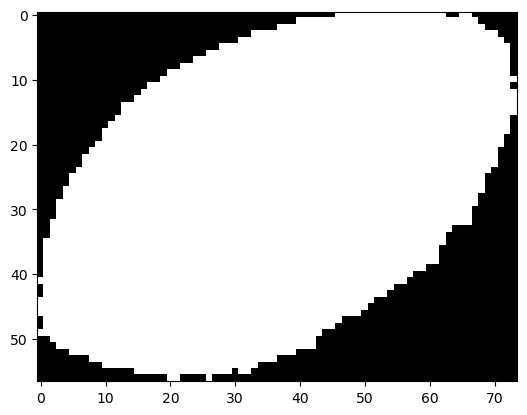

In [21]:
plt.imshow(df.loc[0, 'image'], cmap = 'gray')

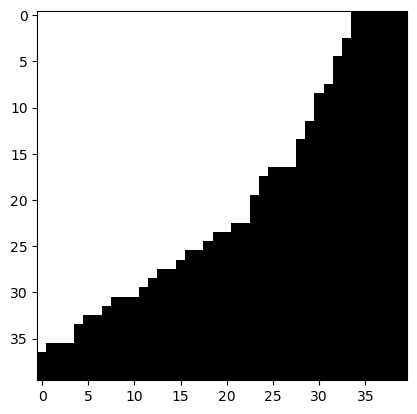

In [22]:
plt.imshow(BW[80:120, 960:1000], cmap = 'gray')